### Lineární regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody SGD.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

In [1]:
import numpy as np
import usu


## Data


In [2]:
npzfile = np.load('data/data_03.npz')
npzfile.files


['x0', 'x1']

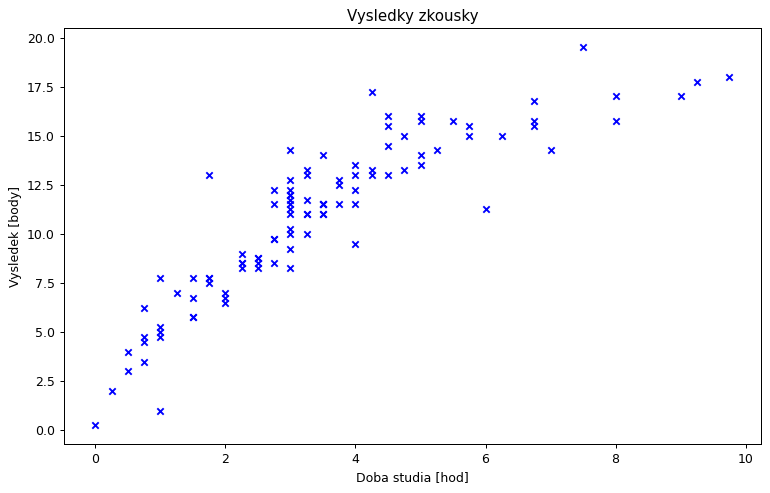

In [3]:
x = npzfile['x0']
y = npzfile['x1']
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


In [6]:
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

## SGD (Steepest gradient descent)

### Výpočet $\theta$:

#### Pomocí sumy:

$$ \theta_{i+1} = \theta_{i} - \alpha \sum_{n=0}^{N} \tilde{X_n} (\theta_i^T \tilde{X_n} - y_n) $$  
kde $\alpha$ je velikost kroku, $n$ odpovídá jednotlivým řádkům vstupních matic.


**Příklad výpočtu první iterace:**

$$ \tilde{X} = \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3 \\
        \end{bmatrix} ,
     y =  \begin{bmatrix}
     15 \\
     20 \\
     30 \\
    \end{bmatrix},
    \theta_0 = \begin{bmatrix}
        0 \\
        0 \\
        \end{bmatrix},
        \alpha = 0.1$$
        
$$ 
\theta_1 = \begin{bmatrix}
        0 \\
        0 \\
        \end{bmatrix} - 0.1 \left[  (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} - 15)\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}) + (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ \end{bmatrix} - 20)\begin{bmatrix} 1 \\ 2 \\ \end{bmatrix}) + (\begin{bmatrix} 0 & 0 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 3 \\ \end{bmatrix} - 30)\begin{bmatrix} 1 \\ 3 \\ \end{bmatrix}) \right] = \begin{bmatrix} 6.5 \\ 14.5 \\ \end{bmatrix}
$$

 
#### Pomocí  matice:
Maticová implementace je řádově výpočetně efektivnější.

$$ \theta_{i+1} = \theta_{i} - \alpha \tilde{X^T} (\tilde{X} \theta_i - y) $$  


**Poznámka:** Rovnice jsou stejné pro ruzné řády polynomů.


### Výpočet $\theta$ se zahrnutím regularizace:
$$ \theta_{i+1} = \theta_{i}(1-\alpha \lambda) - \alpha \tilde{X^T} (\tilde{X} \theta_i - y) $$ 


In [94]:
def computeThetaSGD(vec_x, vec_y, _alpha=0.1, _n_iter=100, _order=1, _lmbd=0):
    """
    x - vektor vstupnich hodnot, doba studia
    y - vektor vystupnich  hodnot, zisk bodu
    alpha - krok
    nIter - pocet iteraci
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    """

    #################################################################
    # ZDE DOPLNIT

    x_tilde = np.insert(vec_x, 0, 1, axis=1)

    if _order >= 2:
        for i in range(2, _order+1):
            x_tilde = np.insert(x_tilde, i, x_tilde[:,1]**i, axis=1)

    # defaultne v matematice je vektor, matice sloupcova - transponovana je radkova
    x_tilde_t = x_tilde.T
    # print(x_tilde)

    _theta = np.zeros((_order+1, 1))

    for i in range(0, _n_iter):
        _theta = _theta * (1 - _alpha * _lmbd) - _alpha * x_tilde_t.dot(x_tilde.dot(_theta) - vec_y)
    # ...
    
    #################################################################
    return _theta


Kontrola výpočtu na malém množství dat:

[[ 6.5]
 [14.5]]


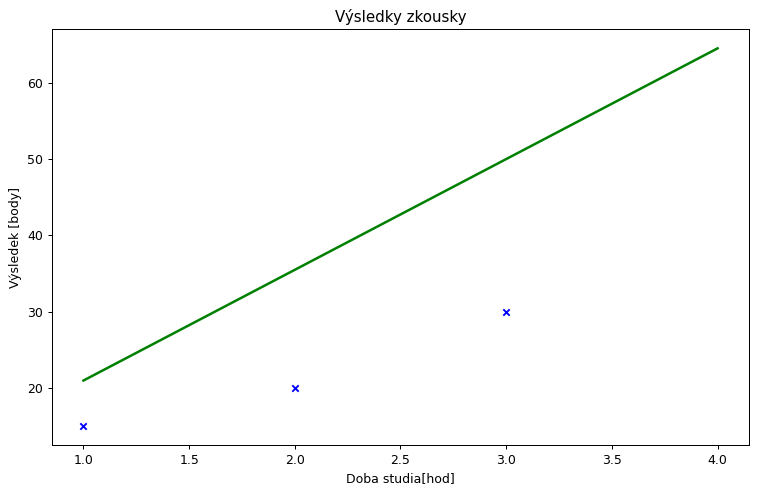

In [60]:
a = np.array([1, 2, 3], ndmin=2).T
b = np.array([15, 20, 30], ndmin=2).T
theta = computeThetaSGD(a, b, _n_iter=1)
print(theta)
usu.draw(a, b, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta)


Určete zisk bodů v případě přípravy v délce 6 hodin. Všimněte si, jak silně $\alpha$ ovlivňuje výsledky:

[[ 1.75565789]
 [ 3.64884986]
 [-0.21760621]]
x : 6.000, y : 15.815


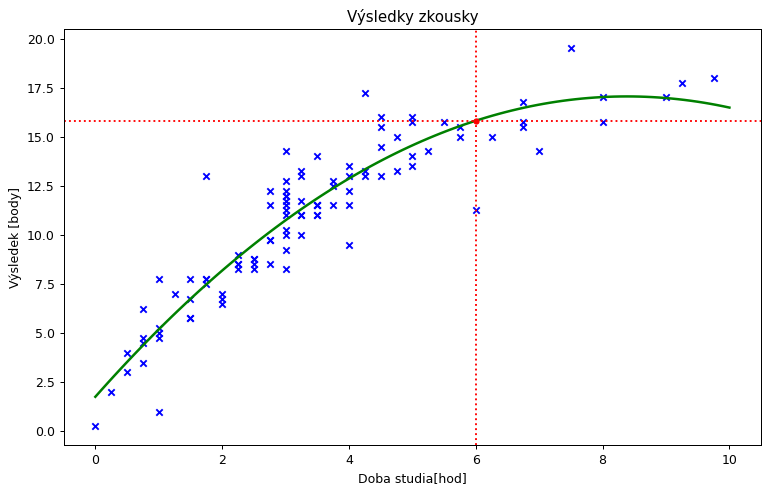

In [104]:
alpha = 0.000001
iterations = 150000
order = 2
theta = computeThetaSGD(x, y, alpha, iterations, order)

print(theta)
#################################################################
# ZDE DOPLNIT

valueX = 6

valueY = 0
for index in range(0, order+1):
    valueY += theta[index] * valueX**index

# Nejvhodnejsi rad polynomu a proc: ...

# 2., pri radu 3 a vyssim vyjdou hodnoty uplne mimo, duvodem je maly pocet trenovacich dat
# reseni:
# - zvysit pocet trenovacich dat
# - mene slozity model

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


Určete dobu studia v případě zisku 10 bodů:


x : 3.025, y : 10.000


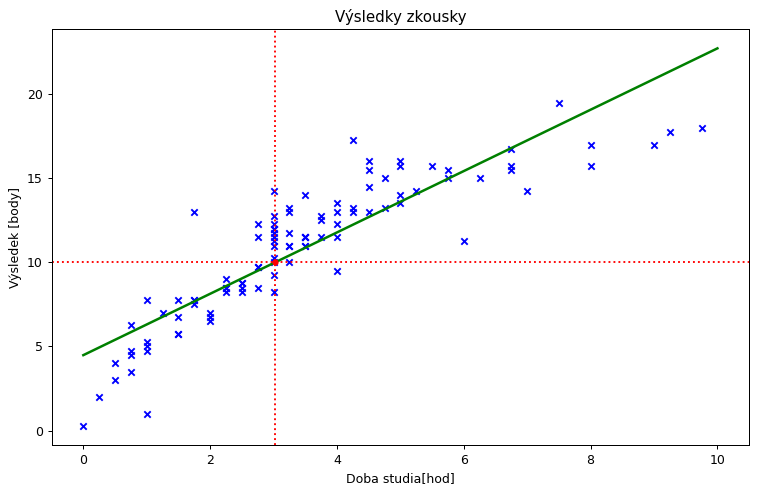

In [108]:
alpha = 0.001
iterations = 100

theta = computeThetaSGD(x, y, alpha, iterations)
#print(theta)

#################################################################
# ZDE DOPLNIT

valueY = 10
valueX = (valueY - theta[0])/theta[1]

#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


Určete zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2, $\lambda$ = 1, $\alpha$ = 
0.00001 a počtu iterací 15000:

[[ 1.7487708 ]
 [ 3.63568271]
 [-0.21543222]]
x : 4.000, y : 12.845


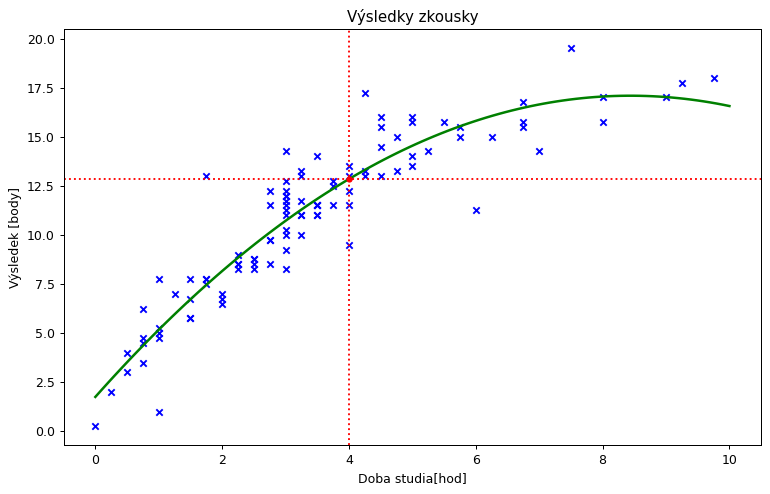

In [111]:
order = 2
lmbd = 1
alpha = 0.00001
iterations = 15000

theta = computeThetaSGD(x, y, alpha, iterations, order, lmbd)
print(theta)

#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = 0
for index in range(0, order+1):
    valueY += theta[index] * valueX**index
#################################################################

usu.draw(x, y, "Výsledky zkousky", "Doba studia[hod]", "Výsledek [body]", theta, valueX, valueY)


### Závěr:
rozhodněte, kdy je vhodnější použít pro nalezení parametrů $\theta$ metodu LSE a kdy SGD:

LSE je vhodnejsi pro linearni modely, kdezto SGD lze pouzit pro jak linearni, tak nelinearni modely, avsak LSE je rychlejsi, zejmena pri malem mnozstvi trenovacich dat.
Pri velkem mnozstvi dat muze byt LSE az technicky nepouzitelne (vysoke naroky na hardware).